In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Data
heart_data = pd.read_csv('heart.csv')

# First Look at Data

In [3]:
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Column details

* age : age in years
* sex : (1 = male; 0 = female)
* cp : chest pain type
* trestbps : resting blood pressure (in mm Hg on admission to the hospital)
* chol : serum cholestoral in mg/dl
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg : resting electrocardiographic results
* thalach : maximum heart rate achieved
* exang : exercise induced angina (1 = yes; 0 = no)
* oldpeak : ST depression induced by exercise relative to rest
* slope : the slope of the peak exercise ST segment
* ca : number of major vessels (0-3) colored by flourosopy
* thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
* target : 1 or 0

# Checking data for null values

In [5]:
heart_data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [6]:
# No Null Values in any column

In [7]:
all_columns = heart_data.columns.values.tolist()
num_columns = ['age','trestbps','chol','thalach','oldpeak']
cat_columns = [clm_name for clm_name in all_columns if clm_name not in num_columns]
print('Columns with continuous data : {} Count = {}\nColumns with catagorical data : {} Count = {}'.format(num_columns,len(num_columns),cat_columns,len(cat_columns)))

Columns with continuous data : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] Count = 5
Columns with catagorical data : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'] Count = 9


# Now checking for duplicates and removing them (if any)

In [8]:
heart_data[heart_data.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
heart_data.drop_duplicates(inplace = True)
heart_data[heart_data.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [10]:
# Removed the duplicate row

# Analyzing data 

In [11]:
# Sex distribution 

male_count = heart_data.sex.value_counts().tolist()[0]
female_count = heart_data.sex.value_counts().tolist()[1]
print('Male :',male_count)
print('Female :',female_count)

Male : 206
Female : 96


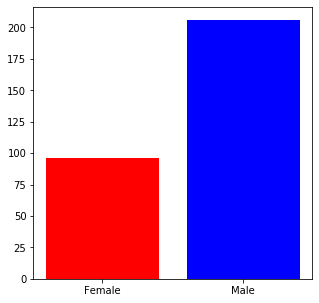

In [12]:
fig, ax = plt.subplots(1,1,figsize = (5,5))

plt.bar(heart_data.sex.unique(),heart_data.sex.value_counts(),color = ['blue','red'],width = 0.8)
plt.xticks(heart_data.sex.unique(),('Male','Female'))

plt.show()

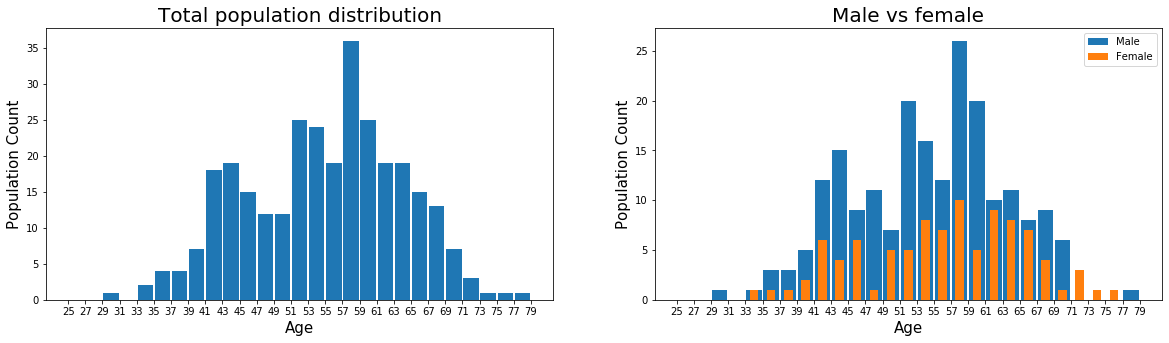

In [13]:
# Population Distribution with age and sex

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,5))
bin_x = range(25,80,2)

ax1.hist(heart_data.age.tolist(),bins=bin_x,rwidth=0.9)
ax1.set_xticks(range(25,80,2))
ax1.set_xlabel('Age',fontsize=15)
ax1.set_ylabel('Population Count',fontsize=15)
ax1.set_title('Total population distribution',fontsize=20)

ax2.hist(heart_data[heart_data['sex']==1].age.tolist(),label = 'Male',bins=bin_x,rwidth=0.9)
ax2.hist(heart_data[heart_data['sex']==0].age.tolist(),label = 'Female',bins=bin_x,rwidth=0.5)
ax2.legend()
ax2.set_xticks(range(25,80,2))
ax2.set_xlabel('Age',fontsize=15)
ax2.set_ylabel('Population Count',fontsize=15)
ax2.set_title('Male vs female',fontsize=20)

plt.show()

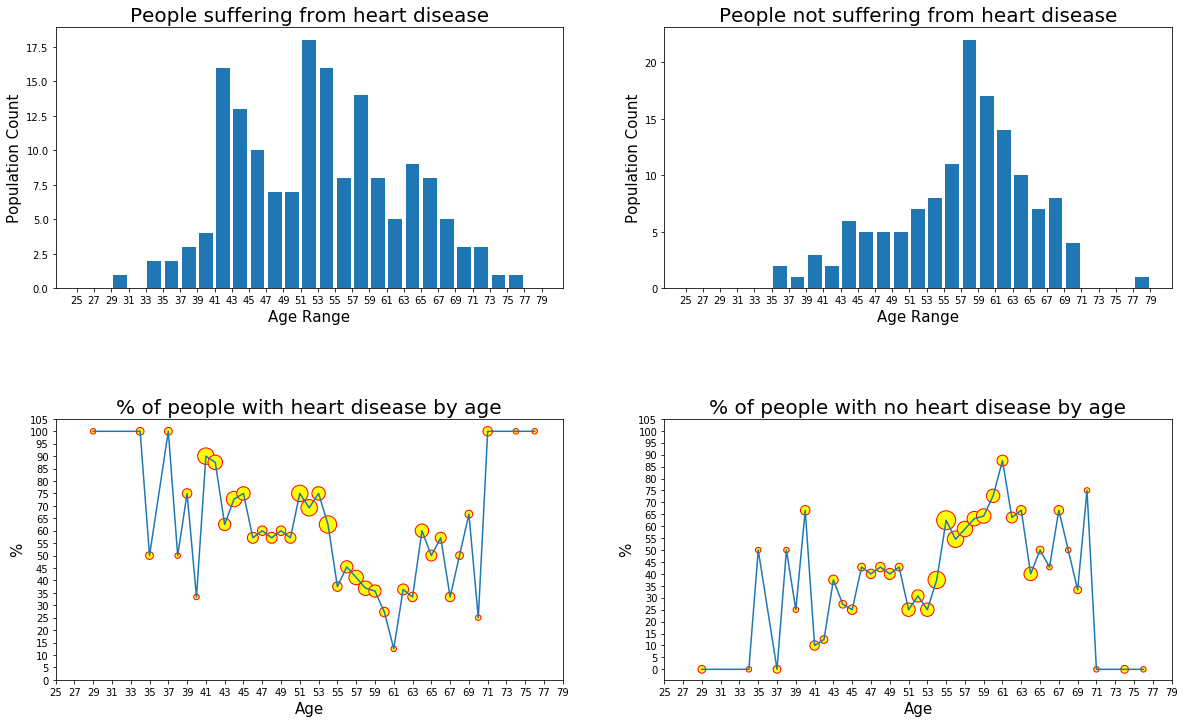

In [14]:
# Population distribution for heart disease

x = heart_data.groupby(['age','target']).agg({'sex':'count'})
y = heart_data.groupby(['age']).agg({'sex':'count'})
z = (x.div(y, level='age') * 100)
q= 100 - z

fig, axes = plt.subplots(2,2, figsize = (20,12))
plt.subplots_adjust(hspace = 0.5)

axes[0,0].hist(heart_data[heart_data['target']==1].age.tolist(),bins=bin_x,rwidth=0.8)
axes[0,0].set_xticks(range(25,80,2))
axes[0,0].set_xlabel('Age Range',fontsize=15)
axes[0,0].set_ylabel('Population Count',fontsize=15)
axes[0,0].set_title('People suffering from heart disease',fontsize=20)

axes[0,1].hist(heart_data[heart_data['target']==0].age.tolist(),bins=bin_x,rwidth=0.8)
axes[0,1].set_xticks(range(25,80,2))
axes[0,1].set_xlabel('Age Range',fontsize=15)
axes[0,1].set_ylabel('Population Count',fontsize=15)
axes[0,1].set_title('People not suffering from heart disease',fontsize=20)

axes[1,0].scatter(z.xs(1,level=1).reset_index().age,z.xs(1,level=1).reset_index().sex,s=(x.xs(1,level=1).sex)*30,edgecolors = 'r',c = 'yellow')
axes[1,0].plot(z.xs(1,level=1).reset_index().age,z.xs(1,level=1).reset_index().sex)
axes[1,0].set_xticks(range(25,80,2))
axes[1,0].set_yticks(range(0,110,5))
axes[1,0].set_xlabel('Age',fontsize=15)
axes[1,0].set_ylabel('%',fontsize=15)
axes[1,0].set_title('% of people with heart disease by age',fontsize=20)

axes[1,1].scatter(z.xs(1,level=1).reset_index().age,q.xs(1,level=1).reset_index().sex,s=(x.xs(0,level=1).sex)*30,edgecolors = 'r',c = 'yellow')
axes[1,1].plot(z.xs(1,level=1).reset_index().age,q.xs(1,level=1).reset_index().sex)
axes[1,1].set_xticks(range(25,80,2))
axes[1,1].set_yticks(range(0,110,5))
axes[1,1].set_xlabel('Age',fontsize=15)
axes[1,1].set_ylabel('%',fontsize=15)
axes[1,1].set_title('% of people with no heart disease by age',fontsize=20)

plt.show()

# Analysis :
> * **Data has lot more entries for Male compare to Female**
> * **Majority of people suffering from heart disease lies between age 40 to 65**
> * **Proability of getting heart disease starts reduce significiently after age of 60**
> * **People from age 37 to 59 has highest chance of getting heart disease by volume**

In [15]:
heart_data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [16]:
# Looking at other features and how they are distributed.
# Scatter plot for continuous data
# Pie plot for catagorical data

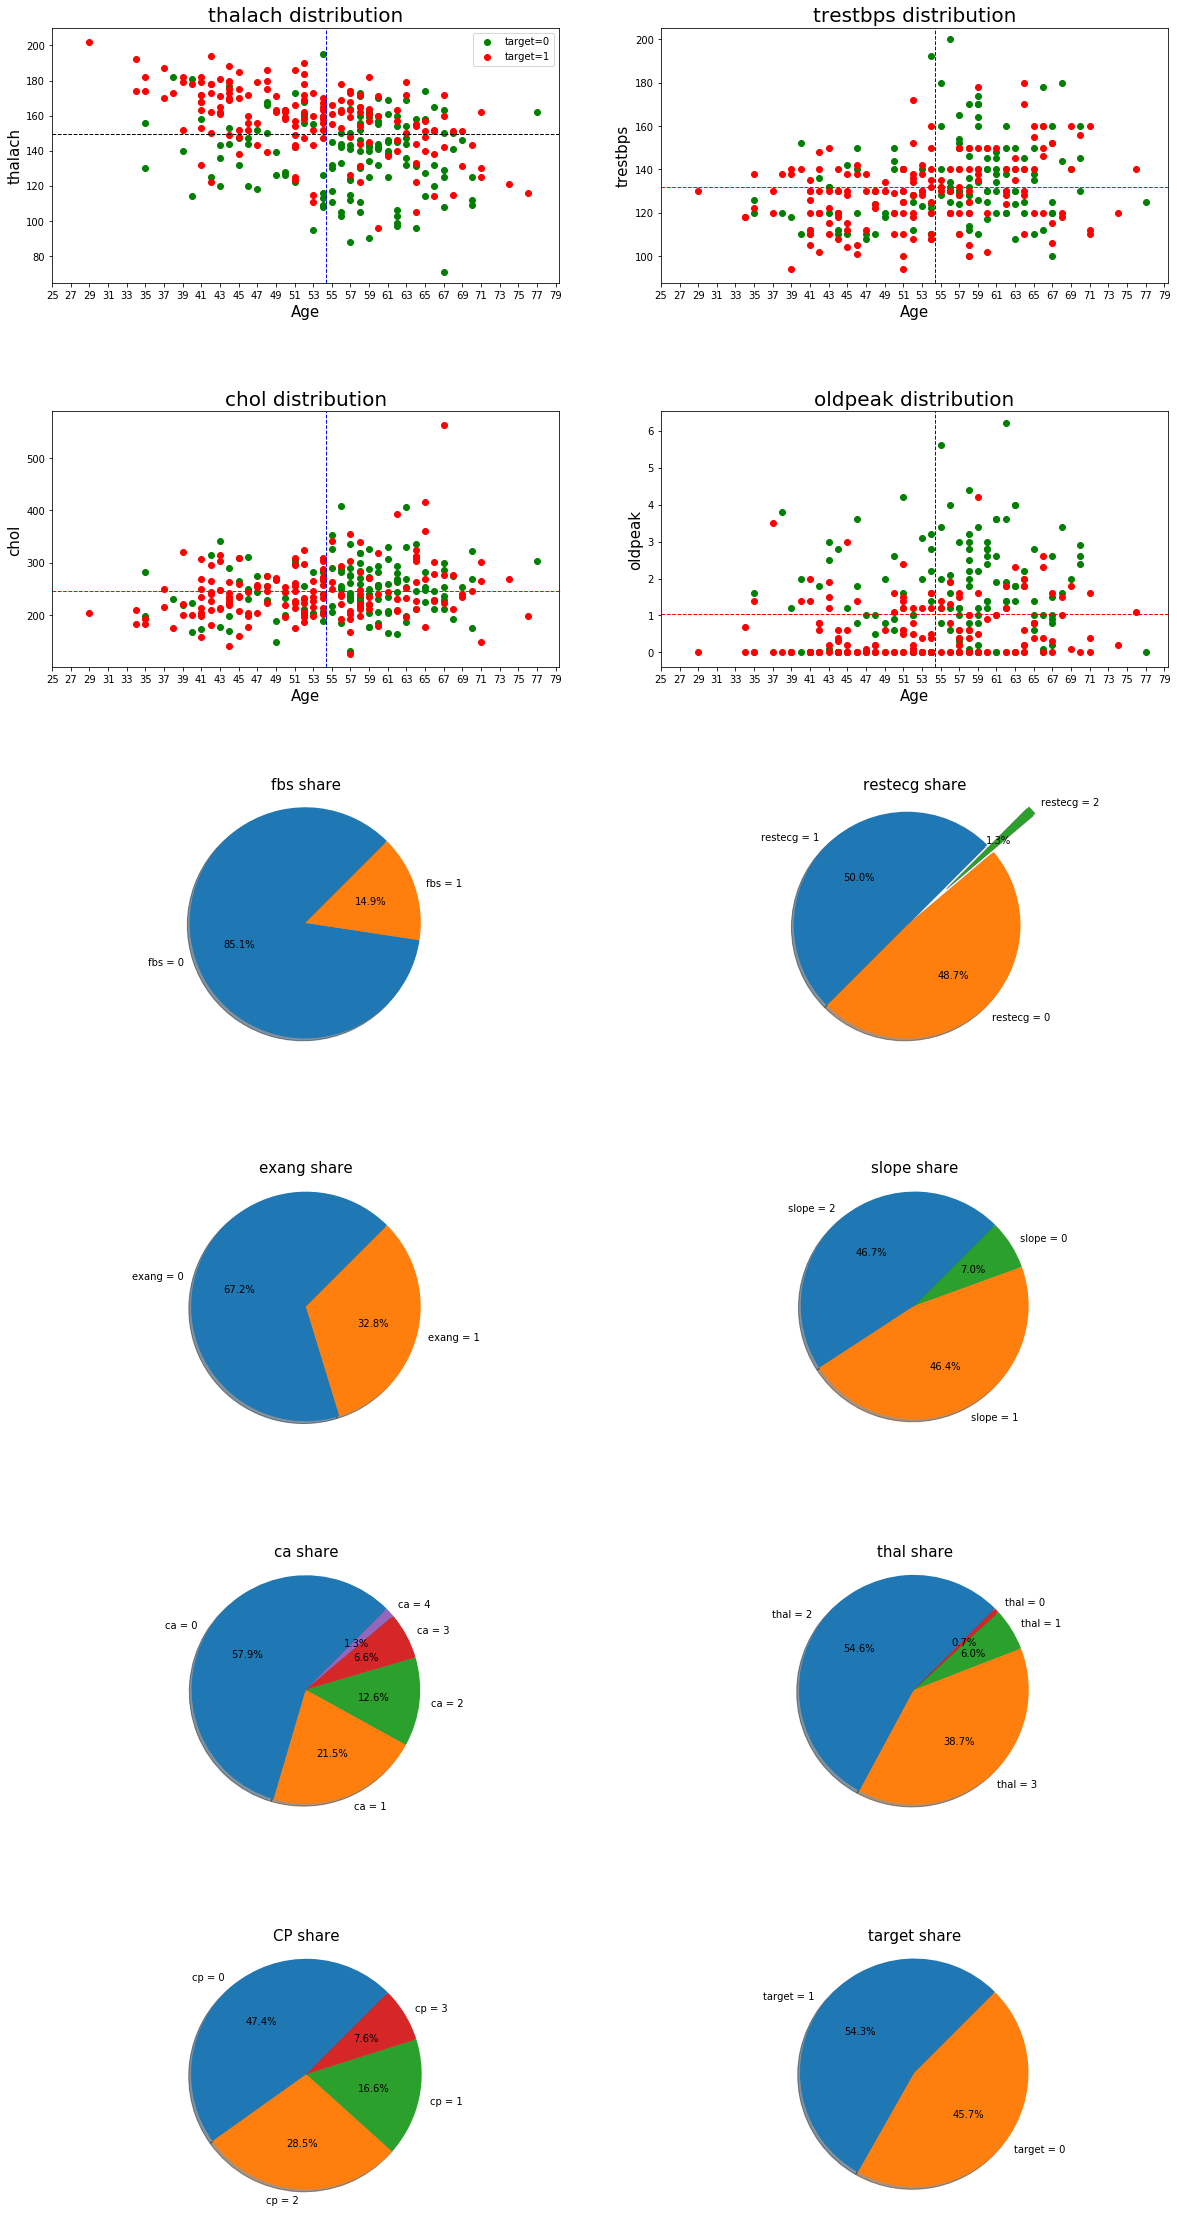

In [17]:
fig, axes = plt.subplots(6,2, figsize = (20,40))
plt.subplots_adjust(hspace = 0.5)

axes[0,0].scatter(heart_data[heart_data['target']==0][['age','thalach']].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','thalach']].sort_values(by = ['age']).thalach, c = 'g',label = 'target=0')
axes[0,0].scatter(heart_data[heart_data['target']==1][['age','thalach']].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','thalach']].sort_values(by = ['age']).thalach, c = 'r',label = 'target=1')
axes[0,0].set_title('thalach distribution',fontsize=20)
axes[0,0].set_xticks(range(25,80,2))
axes[0,0].set_xlabel('Age',fontsize=15)
axes[0,0].set_ylabel('thalach',fontsize=15)
axes[0,0].axhline(np.mean(heart_data['thalach']),xmin=0,xmax=1,linewidth=1, color='black',linestyle = '--')
axes[0,0].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')
axes[0,0].legend()

axes[0,1].scatter(heart_data[heart_data['target']==0][['age','trestbps']].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','trestbps']].sort_values(by = ['age']).trestbps, c = 'g',label = 'target=0')
axes[0,1].scatter(heart_data[heart_data['target']==1][['age','trestbps']].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','trestbps']].sort_values(by = ['age']).trestbps, c = 'r',label = 'target=1')
axes[0,1].set_title('trestbps distribution',fontsize=20)
axes[0,1].set_xticks(range(25,80,2))
axes[0,1].set_xlabel('Age',fontsize=15)
axes[0,1].set_ylabel('trestbps',fontsize=15)
axes[0,1].axhline(np.mean(heart_data['trestbps']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[0,1].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')

# heart_data[heart_data['target']==1][['age','chol',]].sort_values(by = ['age'])
axes[1,0].scatter(heart_data[heart_data['target']==0][['age','chol',]].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','chol',]].sort_values(by = ['age']).chol,c = 'g',label = 'target=0')
axes[1,0].scatter(heart_data[heart_data['target']==1][['age','chol',]].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','chol',]].sort_values(by = ['age']).chol,c = 'r',label = 'target=1')
axes[1,0].set_title('chol distribution',fontsize=20)
axes[1,0].set_xticks(range(25,80,2))
axes[1,0].set_xlabel('Age',fontsize=15)
axes[1,0].set_ylabel('chol',fontsize=15)
axes[1,0].axhline(np.mean(heart_data['chol']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[1,0].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')

axes[1,1].scatter(heart_data[heart_data['target']==0][['age','oldpeak',]].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','oldpeak',]].sort_values(by = ['age']).oldpeak,c = 'g',label = 'target=0')
axes[1,1].scatter(heart_data[heart_data['target']==1][['age','oldpeak',]].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','oldpeak',]].sort_values(by = ['age']).oldpeak,c = 'r',label = 'target=1')
axes[1,1].set_title('oldpeak distribution',fontsize=20)
axes[1,1].set_xticks(range(25,80,2))
axes[1,1].set_xlabel('Age',fontsize=15)
axes[1,1].set_ylabel('oldpeak',fontsize=15)
axes[1,1].axhline(np.mean(heart_data['oldpeak']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[1,1].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')

fbs_count = heart_data['fbs'].value_counts()
labels = [('fbs = '+ str(x)) for x in fbs_count.index]
axes[2,0].pie(fbs_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[2,0].axis('equal')
axes[2,0].set_title('fbs share',fontsize=15)

restecg_count = heart_data['restecg'].value_counts()
labels = [('restecg = '+ str(x)) for x in restecg_count.index]
axes[2,1].pie(restecg_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45,explode = [0,0,0.5])
axes[2,1].axis('equal')
axes[2,1].set_title('restecg share',fontsize=15)

exang_count = heart_data['exang'].value_counts()
labels = [('exang = '+ str(x)) for x in exang_count.index]
axes[3,0].pie(exang_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[3,0].axis('equal')
axes[3,0].set_title('exang share',fontsize=15)

slope_count = heart_data['slope'].value_counts()
labels = [('slope = '+ str(x)) for x in slope_count.index]
axes[3,1].pie(slope_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[3,1].axis('equal')
axes[3,1].set_title('slope share',fontsize=15)

ca_count = heart_data['ca'].value_counts()
labels = [('ca = '+ str(x)) for x in ca_count.index]
axes[4,0].pie(ca_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[4,0].axis('equal')
axes[4,0].set_title('ca share',fontsize=15)

thal_count = heart_data['thal'].value_counts()
labels = [('thal = '+ str(x)) for x in thal_count.index]
axes[4,1].pie(thal_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[4,1].axis('equal')
axes[4,1].set_title('thal share',fontsize=15)

cp_count = heart_data['cp'].value_counts()
labels = [('cp = '+ str(x)) for x in cp_count.index]
axes[5,0].pie(cp_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[5,0].axis('equal')
axes[5,0].set_title('CP share',fontsize=15)

target_count = heart_data['target'].value_counts()
labels = [('target = '+ str(x)) for x in target_count.index]
axes[5,1].pie(target_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[5,1].axis('equal')
axes[5,1].set_title('target share',fontsize=15)

plt.show()

In [18]:
#  Lets look at the correlation matrix and plot it using Pandas Style and Matplotlib
heart_data.corr().round(decimals =2).style.background_gradient(cmap = 'Oranges')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1,-0.09,-0.06,0.28,0.21,0.12,-0.11,-0.4,0.09,0.21,-0.16,0.3,0.07,-0.22
sex,-0.09,1,-0.05,-0.06,-0.2,0.05,-0.06,-0.05,0.14,0.1,-0.03,0.11,0.21,-0.28
cp,-0.06,-0.05,1,0.05,-0.07,0.1,0.04,0.29,-0.39,-0.15,0.12,-0.2,-0.16,0.43
trestbps,0.28,-0.06,0.05,1,0.13,0.18,-0.12,-0.05,0.07,0.19,-0.12,0.1,0.06,-0.15
chol,0.21,-0.2,-0.07,0.13,1,0.01,-0.15,-0.01,0.06,0.05,0,0.09,0.1,-0.08
fbs,0.12,0.05,0.1,0.18,0.01,1,-0.08,-0.01,0.02,0,-0.06,0.14,-0.03,-0.03
restecg,-0.11,-0.06,0.04,-0.12,-0.15,-0.08,1,0.04,-0.07,-0.06,0.09,-0.08,-0.01,0.13
thalach,-0.4,-0.05,0.29,-0.05,-0.01,-0.01,0.04,1,-0.38,-0.34,0.38,-0.23,-0.09,0.42
exang,0.09,0.14,-0.39,0.07,0.06,0.02,-0.07,-0.38,1,0.29,-0.26,0.13,0.21,-0.44
oldpeak,0.21,0.1,-0.15,0.19,0.05,0,-0.06,-0.34,0.29,1,-0.58,0.24,0.21,-0.43


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


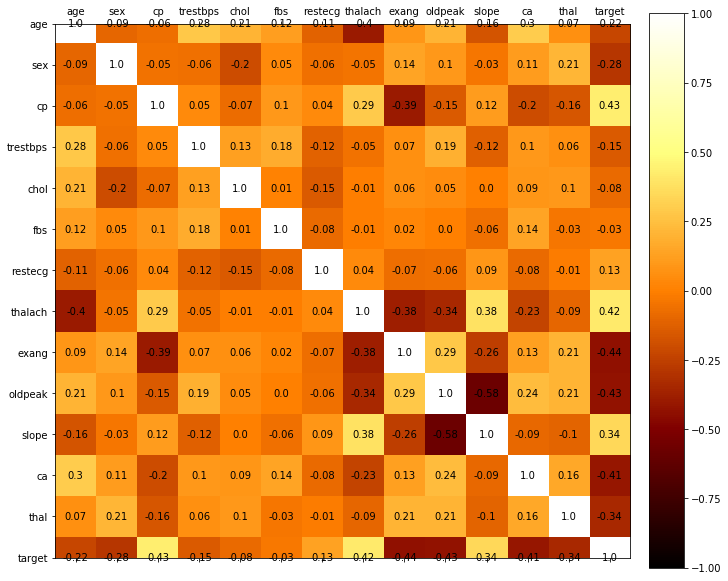

In [19]:
names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
correlations = heart_data.corr()
# plot correlation matrix
fig, ax = plt.subplots(1,1, figsize = (10,8),constrained_layout=True)

cax = ax.matshow(correlations, vmin=-1, vmax=1,cmap = 'afmhot')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
for i in range(len(names)):
    for j in range(len(names)):
        text = ax.text(j, i, heart_data.corr().as_matrix(columns= None)[i, j].round(decimals =2),
                       ha="center", va="center", color="black")
plt.show()

In [20]:
# Corelation with target

x = heart_data.corr()
pd.DataFrame(x['target']).sort_values(by='target',ascending = False).style.background_gradient(cmap = 'Greens')

,target
target,1
cp,0.43208
thalach,0.419955
slope,0.34394
restecg,0.134874
fbs,-0.026826
chol,-0.0814372
trestbps,-0.146269
age,-0.221476
sex,-0.283609


In [21]:
# Importing pakages
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Pre-Processing
Scaling the Data before doing anomoly detection
As anomoly detection methods works better with scaled data, but there is no compulsory need to do so.

In [61]:
mm = MinMaxScaler()
heart_data_tf = mm.fit_transform(heart_data)
heart_data_tf[:5]

array([[0.70833333, 1.        , 1.        , 0.52040816, 0.24429224,
        1.        , 0.        , 0.60305344, 0.        , 0.37096774,
        0.        , 0.        , 0.33333333, 1.        ],
       [0.16666667, 1.        , 0.66666667, 0.36734694, 0.28310502,
        0.        , 0.5       , 0.88549618, 0.        , 0.56451613,
        0.        , 0.        , 0.66666667, 1.        ],
       [0.25      , 0.        , 0.33333333, 0.36734694, 0.17808219,
        0.        , 0.        , 0.77099237, 0.        , 0.22580645,
        1.        , 0.        , 0.66666667, 1.        ],
       [0.5625    , 1.        , 0.33333333, 0.26530612, 0.25114155,
        0.        , 0.5       , 0.81679389, 0.        , 0.12903226,
        1.        , 0.        , 0.66666667, 1.        ],
       [0.58333333, 0.        , 0.        , 0.26530612, 0.52054795,
        0.        , 0.5       , 0.70229008, 1.        , 0.09677419,
        1.        , 0.        , 0.66666667, 1.        ]])